<center><h2><strong><font color="blue">Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</font></strong></h2></center>

<img alt="" src="images/Ray-pink-Property-Case-Banner.jpg"/>

# Kasus:

* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

# Petunjuk:

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi *data driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

# Catatan:

* Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
* Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
* Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
* Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
* Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
 - Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
* Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
* Anda tidak diperkenankan bertanya pertanyaan yang:
 - Merupakan jawaban atau menjurus ke jawaban studi kasus.
 - Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
* Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)

# Komponen Penilaian:

* Code tidak diubah sejak deadline studi kasus.
* Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
* Pemilihan preprocessing dan visualisasi yang tepat
* Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
* Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.

# Data Understanding (DU):

Keterangan Varabel:
* Created_at: Tanggal dimana iklan rumah dibuat
* LT		: Luas Tanah properti yang ditawarkan
* LB		: Luas Bangunan properti yang ditawarkan
* KT		: Jumlah Kamar Tidur properti yang ditawarkan
* KM		: Jumlah Kamar Mandi properti yang ditawarkan
* Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport	: Jumlah kapasitas Carport di properti yang ditawarkan
* Lokasi	: Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik	: Daya listrik dari properti yang ditawarkan
* Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana
* Harga 	: Harga property yang ditawarkan dalam Rupiah
* URL		: Alamat tautan (link) property yang ditawarkan.
* Deskripsi	: Deskripsi iklan property yang ditawarkan. 

In [1]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

# Preprocessing

In [2]:
dfD.drop(dfD.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)
dfJ.drop(dfJ.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)
dfB.drop(dfB.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)
dfT.drop(dfT.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)
dfX.drop(dfX.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)

In [3]:
dfD.drop_duplicates(inplace=True)
dfJ.drop_duplicates(inplace=True)
dfB.drop_duplicates(inplace=True)
dfT.drop_duplicates(inplace=True)
dfX.drop_duplicates(inplace=True)

In [4]:
dfD.drop([118,120,121],inplace=True)
dfJ.drop([121],inplace=True)
dfB.drop([193],inplace=True)
dfX.drop([107],inplace=True)
dfT.drop([124],inplace=True)

In [5]:
def fillnull(df):	
    df["LT"].fillna(0,inplace=True)
    df["LB"].fillna(0,inplace=True)
    df["KT"].fillna(0,inplace=True)
    df["KM"].fillna(0,inplace=True)
    df["garasi"].fillna(0,inplace=True)
    df["carport"].fillna(0,inplace=True)
    df["lokasi"].fillna('Not Given',inplace=True)
    df["sertifikat"].fillna('Not Given',inplace=True)
    df["listrik"].fillna(0,inplace=True)
    df["hadap"].fillna('Not Given',inplace=True)
    df["harga"].fillna(0,inplace=True)
    df["URL"].fillna('Not Given',inplace=True)
    df["deskripsi"].fillna('Not Given',inplace=True)
    df["LT"] = df["LT"].astype('float')
    df["lokasi"] = df["lokasi"].astype('category')
    df["sertifikat"] = df["sertifikat"].astype('category')
    df["hadap"] = df["hadap"].astype('category')


In [6]:
fillnull(dfD)
fillnull(dfJ)
fillnull(dfB)
fillnull(dfX)
fillnull(dfT)

In [7]:
dfD['wilayah']='Depok'

In [8]:
dfD['wilayah']='Depok'
dfX['wilayah']='Bekasi'
dfT['wilayah']='Tangerang'
dfB['wilayah']='Bogor'
dfJ['wilayah']='Jakarta'

In [9]:
df = pd.concat([dfD,dfB,dfJ,dfT,dfX],ignore_index=True)


In [10]:
df["LT"] = df["LT"].astype('float')
df["lokasi"] = df["lokasi"].astype('category')
df["sertifikat"] = df["sertifikat"].astype('category')
df["hadap"] = df["hadap"].astype('category')
df["wilayah"] = df["wilayah"].astype('category')

In [11]:
df.dtypes

created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi        category
sertifikat    category
listrik        float64
hadap         category
harga          float64
URL             object
deskripsi       object
wilayah       category
dtype: object

# EDA

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


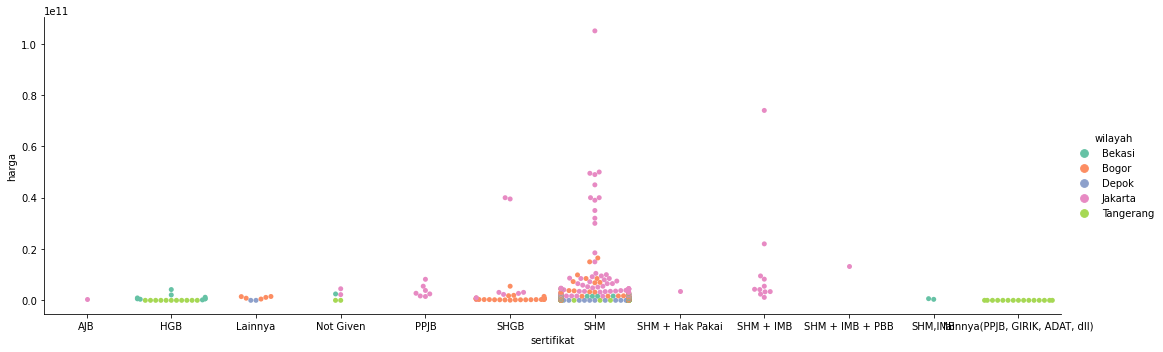

In [35]:
sns.catplot(x="sertifikat",y="harga",kind="swarm",data=df,aspect=3,hue="wilayah",palette="Set2")

c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LT', ylabel='harga'>

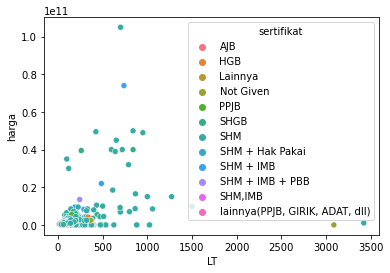

In [22]:
sns.scatterplot(df["LT"],df["harga"],hue=df["sertifikat"],)

In [29]:
df.iloc[325]["URL"]

'https://www.rumah.com/listing-properti/dijual-cempaka-putih-oleh-hardi-prastian-19352202'

In [26]:
df.sort_values(by=["LT"],ascending=False,)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,wilayah
325,05-12-2021,3422.0,64.0,1.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,Not Given,1.050000e+09,https://www.rumah.com/listing-properti/dijual-...,Vlaster cempaka merupakan suatu kompleks perum...,Jakarta
532,12-06-2021,3087.0,2500.0,5.0,5.0,10.0,10.0,"BSD BUKIT GOLF, TANGERANG",Not Given,66000.0,Not Given,1.000000e+05,https://www.rumah123.com/properti/tangerang/ho...,Rumah Super Mewah Bukit Golf BSD City rumah me...,Tangerang
144,06-12-2021,1500.0,1200.0,8.0,6.0,0.0,8.0,Cileungsi,SHM,17600.0,Not Given,9.900000e+09,https://www.rumah.com/listing-properti/dijual-...,"Akses mobil besar 40 ft bisa masuk, parkir mob...",Bogor
155,06-12-2021,1272.0,500.0,4.0,5.0,0.0,2.0,Babakan Madang,SHM,5500.0,Not Given,1.500000e+10,https://www.rumah.com/listing-properti/dijual-...,Rumah best view,Bogor
292,03-12-2021,1058.0,283.0,6.0,6.0,3.0,5.0,Bogor Tengah,SHM,1300.0,Not Given,8.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah di pinggir jalan,Bogor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,05-12-2021,23.0,40.0,2.0,2.0,1.0,0.0,Jakarta Pusat,SHM,2200.0,Not Given,7.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Rumah 2 lantai mewah, nyaman, bebas banjir",Jakarta
330,02-12-2021,21.0,37.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,1300.0,Not Given,5.330000e+08,https://www.rumah.com/listing-properti/dijual-...,Not Given,Jakarta
313,06-12-2021,19.0,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,Not Given,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
333,07-12-2021,18.0,33.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,Not Given,4.250000e+08,https://www.rumah.com/listing-properti/dijual-...,"Kualitas bangunan & material terbaik, one gate...",Jakarta
